#!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling

In [263]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df_train = pd.read_csv(r"dataset/Train.csv")
df_test = pd.read_csv(r"dataset/Test.csv")

In [265]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [266]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [267]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [268]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [269]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


With Mean and mode we will fill the null value in item weight and outlet size respectivly, because item weight is interger and outletsize is categorical so implement Mode Imputation.

Describe show the mean information of only interger columns

In [270]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [271]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [272]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [273]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [274]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [275]:
df_train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [276]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [277]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [278]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [279]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [280]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [281]:
df_train['Outlet_Size'].isnull().sum()

0

In [282]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Selecting features based on general requirements

In [283]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [284]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [285]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


EDA, Exploratory data analysis with Dtale library

In [286]:
import dtale

In [287]:
# import dtale.app as dtale_app
# dtale.show(df_train) 

import dtale
import dtale.app as dtale_app


In [288]:
d =dtale.show(df_train) 
d

EDA using padas profiling

In [289]:
from pydantic_settings import BaseSettings

In [290]:
from ydata_profiling import ProfileReport

In [291]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [292]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [293]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [294]:
# df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
# df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])
# df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])
# df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])
# df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])

In [295]:
# plt.figure(figsize=(10,5))
# sns.heatmap(df_train.corr())
# plt.show()

In [296]:
#EDA using klib library
import klib

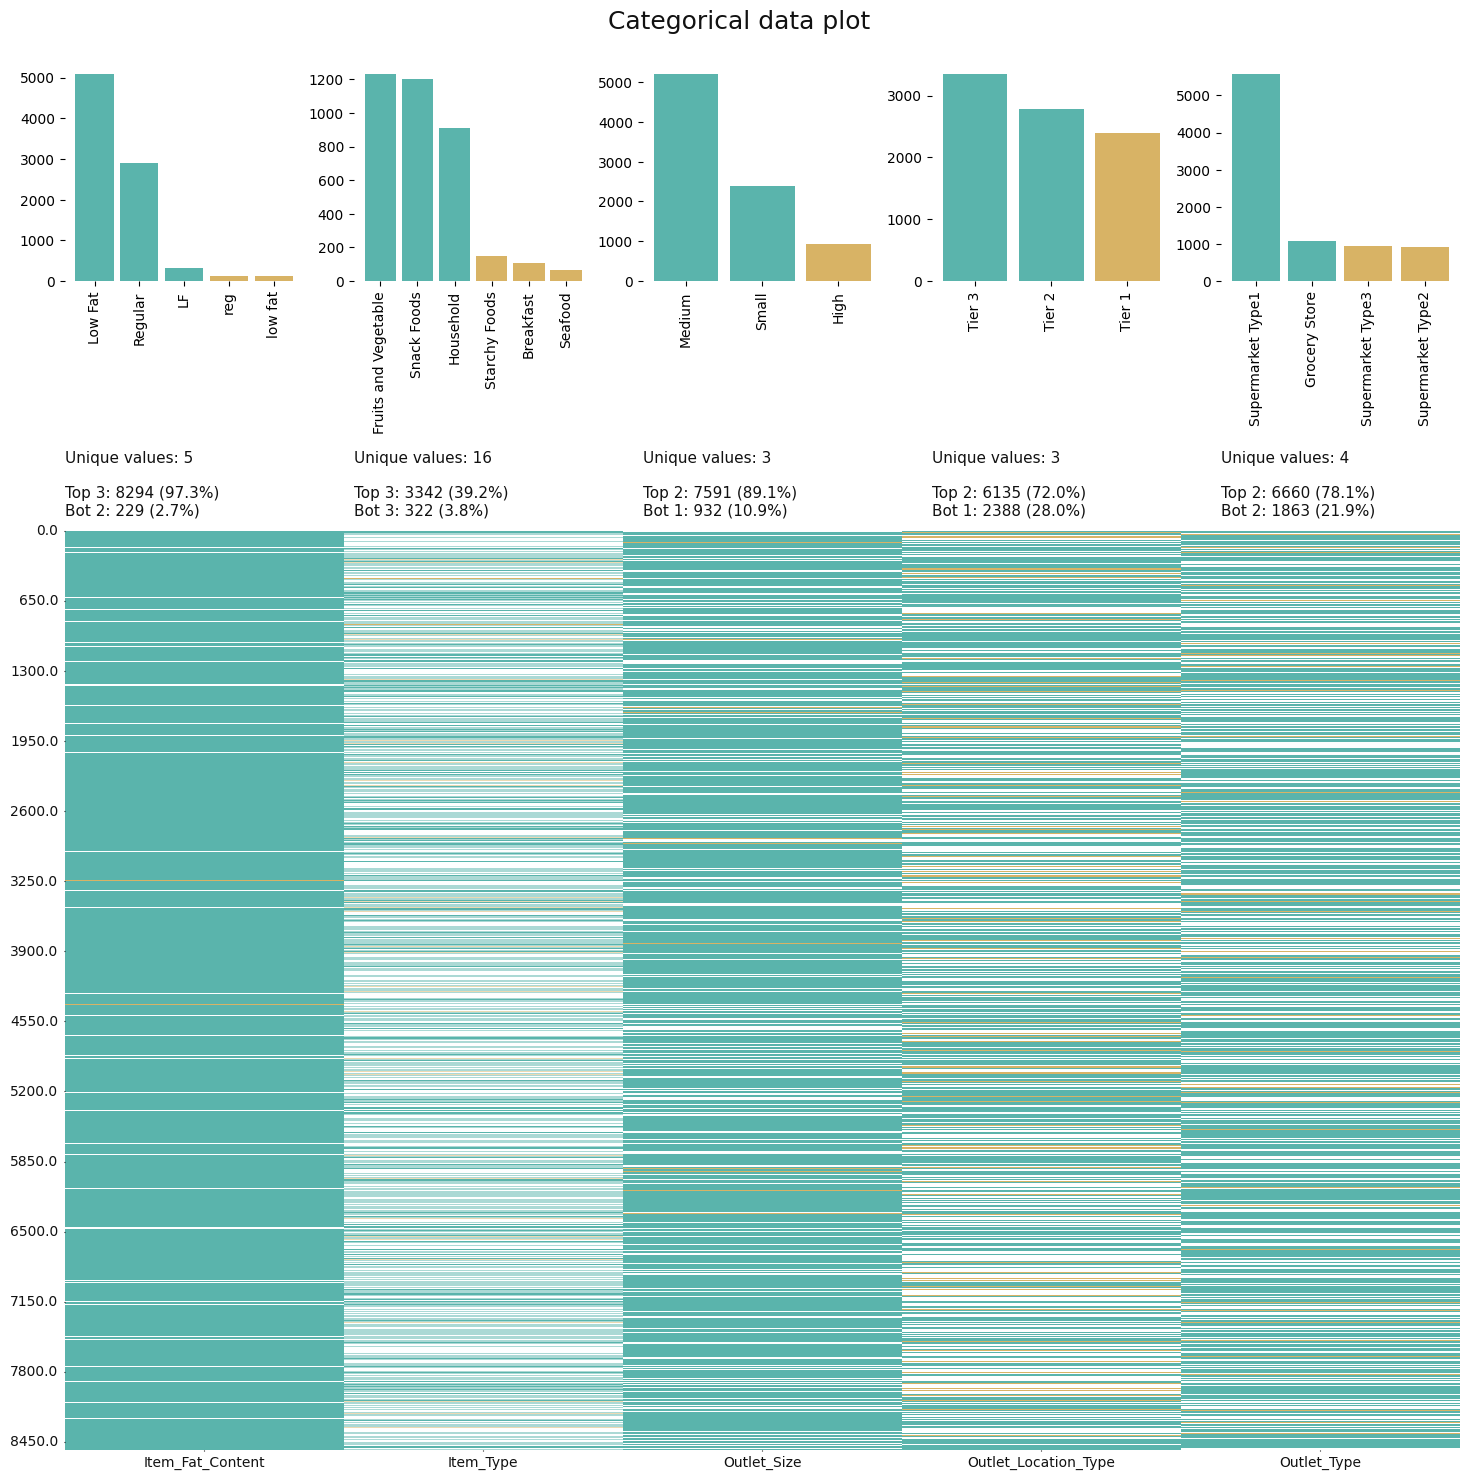

In [297]:
k = klib.cat_plot(df_train)

In [298]:
k

GridSpec(6, 5)

In [299]:
klib.corr_mat(df_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


In [300]:
klib.corr_mat(df_test)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.00,-0.02,0.05,0.01
Item_Visibility,-0.02,1.00,-0.01,-0.10
Item_MRP,0.05,-0.01,1.00,-0.01
Outlet_Establishment_Year,0.01,-0.10,-0.01,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

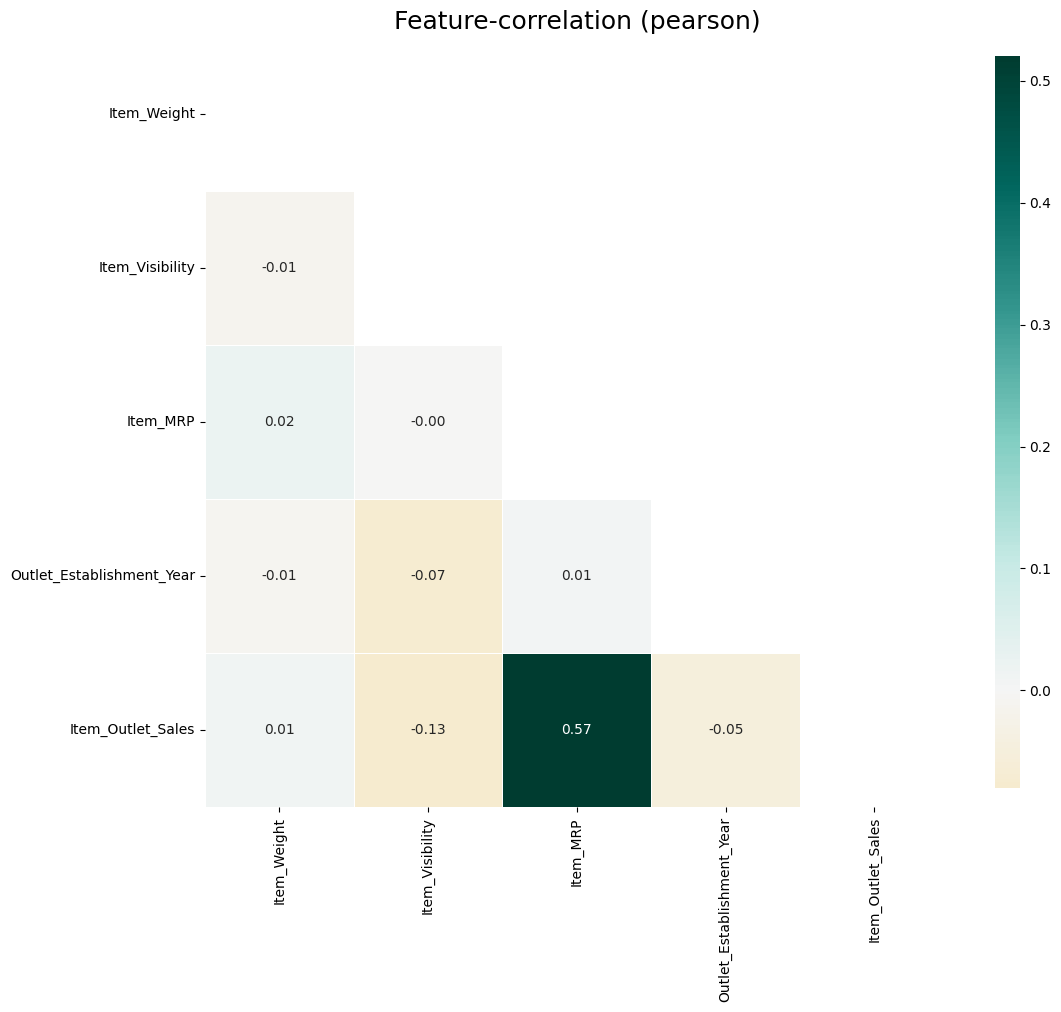

In [301]:
klib.corr_plot(df_train)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

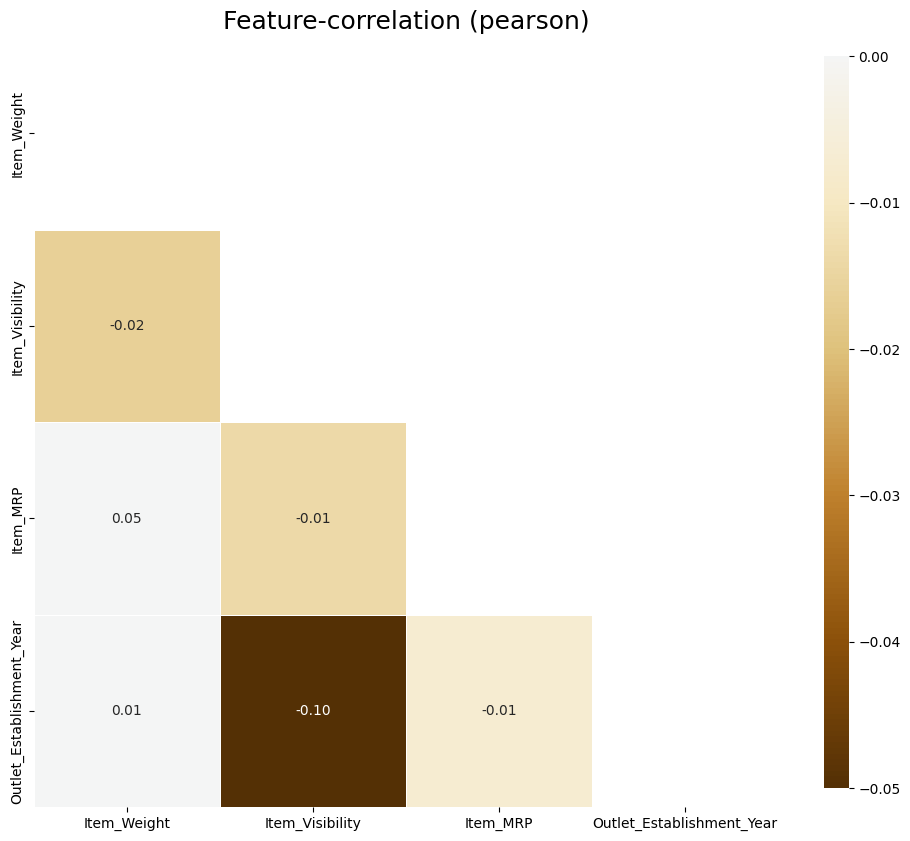

In [302]:
klib.corr_plot(df_test)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='Item_Weight', ylabel='Density'>

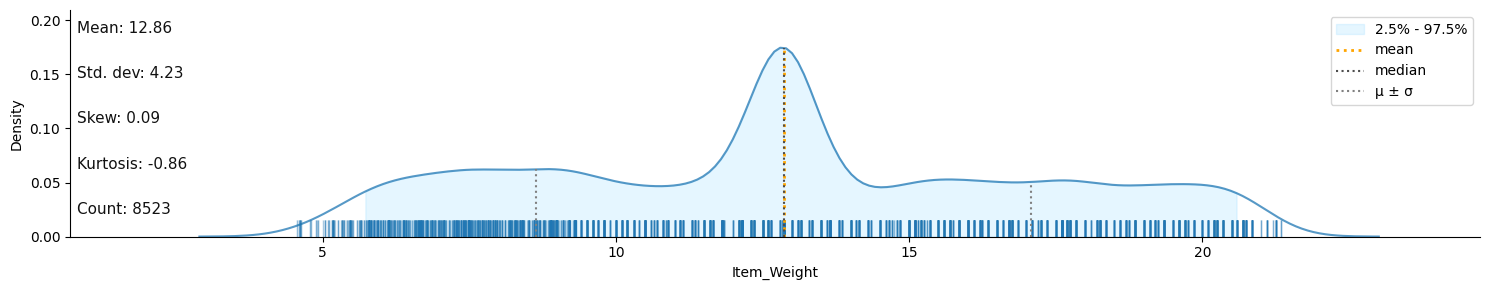

In [303]:
klib.dist_plot(df_train)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='Item_Weight', ylabel='Density'>

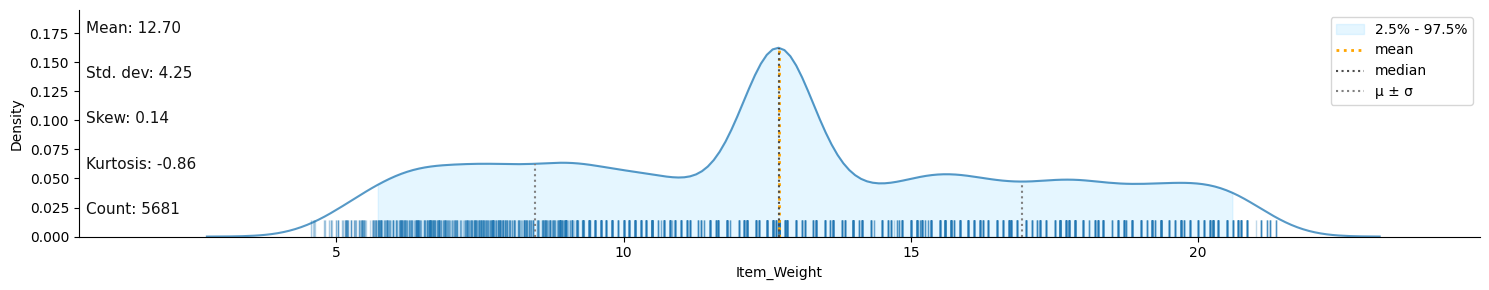

In [304]:
klib.dist_plot(df_test)


In [305]:
klib.missingval_plot(df_train)
klib.missingval_plot(df_test)

No missing values found in the dataset.
No missing values found in the dataset.


Data cleaning using Klib library for reduce memory

In [306]:
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(df_test) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)

Shape of cleaned data: (5681, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.29 MB (-74.36%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.862198,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.319801,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.753799,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.033997,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.229996,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.315399,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.144806,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.744003,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.621796,2007,Medium,Tier 2,Supermarket Type1


In [307]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(df_test) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [308]:
klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

klib.convert_datatypes(df_test) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dty

In [309]:
klib.drop_missing(df_train) # drops missing values, also called in data_cleaning()
klib.drop_missing(df_test) # drops missing values, also called in data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [310]:
klib.mv_col_handling(df_train) # drops features with high ratio of missing vals based on informational content
klib.mv_col_handling(df_test) # drops features with high ratio of missing vals based on informational content

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [311]:
klib.pool_duplicate_subsets(df_train) # pools subset of cols based on duplicates with min. loss of information
klib.pool_duplicate_subsets(df_test) # pools subset of cols based on duplicates with min. loss of information


,item_visibility,item_mrp,pooled_vars
0,0.007565,107.8622,0
1,0.038428,87.3198,1
2,0.099575,241.7538,2
3,0.015388,155.0340,3
4,0.118599,234.2300,4
...,...,...,...
5676,0.013496,141.3154,2436
5677,0.142991,169.1448,5677
5678,0.073529,118.7440,5678
5679,0.000000,214.6218,5679


In [312]:
df_train


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [313]:
df_train = klib.convert_datatypes(df_train)
df_train.info()
df_test = klib.convert_datatypes(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Nu

#Preprocessing task before model building

In [314]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [315]:
#1) Label Encoding

In [316]:
list_cat = ['item_type','outlet_size','outlet_location_type','outlet_type']

In [317]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [318]:
# df_train= df_train.apply(le.fit_transform)

In [319]:
df_train['item_fat_content']=le.fit_transform(df_train['item_fat_content'])
df_train['item_type']=le.fit_transform(df_train['item_type'])
df_train['outlet_size']=le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']=le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']=le.fit_transform(df_train['outlet_type'])

In [320]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


In [321]:
import joblib

In [322]:

le_save_name = 'le.sav'
le_path = F"D:\data science\data science project\storesalesprediction-20240314T142050Z-001\storesalesprediction\{le_save_name}" 
joblib.dump(le, le_path)

['D:\\data science\\data science project\\storesalesprediction-20240314T142050Z-001\\storesalesprediction\\le.sav']

In [323]:
#One Hot Encoding

In [324]:
# from sklearn.preprocessing import OneHotEncoder
# ohe= OneHotEncoder()

In [325]:
# df_train = pd.get_dummies(df_train, columns=['item_fat_content','outlet_size','outlet_location_type','outlet_type'])

In [326]:
# df_train = ohe.fit_transform(df_train,list_cat)

In [327]:
# df_train

In [328]:
X=df_train.drop('item_outlet_sales',axis=1)


In [329]:
Y=df_train['item_outlet_sales']

In [330]:
#splitting out data into train and test.

In [331]:
from sklearn.model_selection import train_test_split
x_train,x_test, Y_train, Y_test = train_test_split(X,Y,random_state=101, test_size=0.2)

In [332]:
#4) Standarization, for keep values equal or nearly each other data, otherwise more different will be in the column data.
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275066,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [333]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [334]:
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.transform(x_test)

In [335]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [336]:
X_test_std

array([[-0.43860916, -0.57382672, -0.21609253, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570184, -0.57382672, -0.52943464, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.2184578 ,  0.97378032,  0.16277341, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508101, -0.57382672,  0.8782423 , ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171909, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558541,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [337]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [338]:

sc_save_name = 'sc.sav'
sc_path = F"D:\data science\data science project\storesalesprediction-20240314T142050Z-001\storesalesprediction\{sc_save_name}" 
joblib.dump(sc, sc_path)

['D:\\data science\\data science project\\storesalesprediction-20240314T142050Z-001\\storesalesprediction\\sc.sav']

#Model Building

In [339]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [340]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [341]:
x_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1


In [342]:
Y_pred_lr = lr.predict(X_test_std)

In [343]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [344]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875773270634
880.99990440845
1162.4412631603452


In [345]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [346]:
#standerdiviation  option for randomforest algorithem
rf.fit(x_train,Y_train)

RandomForestRegressor()

In [347]:
Y_pred_rf = rf.predict(x_test)

In [348]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5413503662428634
790.2401844096477
1118.0284146901708


In [349]:
#Hyper Parameter Tuning

In [350]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#define  models and parameter
model = RandomForestRegressor()
#value is, which parameter give best result
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")



Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.520 (0.003) with: {'n_estimators': 10}
0.545 (0.004) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [351]:
grid_search_forest.best_params_


{'n_estimators': 1000}

In [352]:
grid_search_forest.best_score_


0.549891167510578

In [353]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)


In [354]:
r2_score(Y_test,Y_pred_rf_grid)


0.547517781372842

In [355]:
#Save your model

In [357]:
#https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2

model_save_name = 'random_forest_grid.sav'
path = F"D:\data science\data science project\storesalesprediction-20240314T142050Z-001\storesalesprediction\{model_save_name}" 
joblib.dump(grid_search_forest, path)



['D:\\data science\\data science project\\storesalesprediction-20240314T142050Z-001\\storesalesprediction\\random_forest_grid.sav']

In [358]:

# model_save_name = 'classifier.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}"
# model.load_state_dict(torch.load(path))

model=joblib.load(path)




In [359]:
model.predict(X_test_std)


array([1686.3315856 , 3593.020263  , 1306.37884222, ...,  396.46392503,
       1660.94796765, 2366.28918393])